# Statistics and Analysis of Ships and Anime 

In [46]:
#Import libraries
import pandas as pd
import numpy as np
import datetime
import ast
import statsmodels.formula.api as sm
from scipy import stats

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from pandas.plotting import scatter_matrix

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [2]:
# Characters who appear >10 times in the fanfiction, their names gathered into a in a csv file. Converted to pandas DF.
characters = pd.read_csv('myhero_names.csv')

# Archive of Our Own
AO3 = pd.read_csv('AO3.csv')
AO3['published'] = pd.to_datetime(AO3['published'])

# Series overview: Original season number, Number of episodes, First aired, and Last aired.
og_season_anime_airdate = pd.read_csv('og_air_clean.csv')

# Season 1 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Original air date, and English air date.
season_one_anime = pd.read_csv('season_one_clean.csv')

# Season 2-6 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Viewership rating, Original air date, and English air date.
season_two_anime = pd.read_csv('season_two_clean.csv')
season_three_anime = pd.read_csv('season_three_clean.csv')
season_four_anime = pd.read_csv('season_four_clean.csv')
season_five_anime = pd.read_csv('season_five_clean.csv')
season_six_anime = pd.read_csv('season_six_clean.csv')

# Original Video Animation (OVA) titled "Save! Rescue Training!"
# Number (8 total released), Title, Storyboard by, Directed by, Written by, Original release date.
og_vid_animation_anime =  pd.read_csv('OVAs_clean.csv')

# Japan Home Video Release
# Season, Volume, Epsiodes, Release date.
Japan_homevid_release_anime = pd.read_csv('Japan_HV_clean.csv')

# Funimation/Crunchyroll (North America)
# Season, Volume, Episodes, Release date.
funimation_crunchyroll_anime = pd.read_csv('Fun_Crunch_NA_clean.csv')

# Universal Pictures/Manga Entertainment (UK and Ireland)
# Season, Volume, Episodes, Release date.
universalpictures_manga_anime = pd.read_csv('Up_Uk_clean.csv')

# Universal Sony/Madman Entertainment (Australia and New Zealand)
# Season, Volume, Episodes, Release date Universal, Release date Madman.
universalsony_madman_anime = pd.read_csv('Us_Me_clean.csv')

# Manga
manga = pd.read_csv('mangas_clean.csv')

In [5]:
name_1 = [x for x in characters['1'].values]
name_2 = [x for x in (characters['2'].dropna().values)]
mhanames = name_1 + name_2


In [7]:
dont_want = ['Parents', 'Suffering', 'Loss Of His Will', 'Niece', 'mentioned', 'Family', 'Notebooks', 'Character', 'quirk', 'Friend', 'Eriks', 'Werewolf', 'Prototype', 'Mother', 'Sibling', 'Sidekicks', 'l Jade', 'Nezuko']

In [8]:
AO3['ships'] = AO3['ships'].apply(ast.literal_eval)

In [9]:
Ships = AO3.explode('ships')['ships'].value_counts()

In [10]:
characters['First'] = characters['1']
characters = characters.set_index('First')

In [11]:
def pullship(char1, char2):
    name = []
    name2 = []
    try:
        for i in characters.loc[char1]:
            if type(i) != float:
                name.append(i)
    except:
        name.append(char1)
        
    try:
        for i in characters.loc[char2]:
            if type(i) != float:
                name2.append(i)
    except:
        name2.append(char2)
    
    ship = [name, name2]
    shipname = char1 + ' & ' + char2
    if char1 not in AO3.columns:
        AO3[char1] = 0
    if char2 not in AO3.columns:
        AO3[char2] = 0
    AO3[shipname] = 0
    for index, row in AO3.iterrows():
        for name in ship[0]:
            if name in ''.join(row['ships']):
                for name2 in ship[1]:
                    if name2 in ''.join(row['ships']):
                        if row[shipname] == 0:
                            AO3.loc[index, shipname] = 1
                        if row[char1] == 0 or row[char2] == 0:
                            AO3.loc[index, char1] =+ 1
                            AO3.loc[index, char2] =+ 1

In [12]:
pullship('Deku', 'Katsuki')
pullship('Aizawa', 'Yamada Hizashi')
pullship('Aizawa', 'Deku')
pullship('Katsuki', 'Enjiro')
pullship('Deku', 'Todoroki Sho')
pullship('Dabi', 'Keigo')
pullship('Deku', 'Uraraka')
pullship('Deku', 'All Might')
pullship('Deku', 'Class')
pullship('Denki', 'Shinsou Hitoshi')
pullship('Deku', 'Shinsou Hitoshi')
pullship('Katsuki', 'Reader')
pullship('Katsuki', 'Todoroki Sho')
pullship('Deku', 'Yamada Hizashi')
pullship('Mina', 'Eijirou')
pullship('Jirou Kyouka', 'Denki')
pullship('Deku', 'Shigaraki Tomura')
pullship('Aizawa', 'Shinsou Hitoshi')
pullship('Deku', 'Nedzu')
pullship('Deku', 'Reader')

In [13]:
AO3 = AO3.rename(columns = {'Aizawa & Shinsou Hitoshi': 'Aizawa & Shinsou', 'Shinsou Hitoshi': 'Shinsou',
                            'Jirou Kyouka & Denki': 'Jirou & Denki','Jirou Kyouka': 'Jirou',
                            'Mina & Eijirou': 'Mina & Kirashima', 'Eijirou': 'Kirashima',
                            'Deku & Yamada Hizashi': 'Deku & Prez Mic', 'Yamada Hizashi': 'Prez Mic',
                            'Katsuki & Todoroki Sho': 'Bakugo & Shoto',
                            'Todoroki Sho': 'Shoto', 'Katsuki & Reader': 'Bakugo & Reader', 
                            'Katsuki': 'Bakugo', 'Deku & Shinsou Hitoshi': 'Deku & Shinsou',
                            'Denki & Shinsou Hitoshi': 'Denki & Shinsou', 'Dabi & Keigo': 'Dabi & Hawks',
                            'Keigo': 'Hawks', 'Deku & Todoroki Sho': 'Deku & Shoto',
                            'Katsuki & Enjiro': 'Bakugo & Kirishima', 'Deku & Katsuki': 'Deku & Bakugo',
                            'Aizawa & Yamada Hizashi': 'Aizawa & Prez Mic'})


In [14]:
AO3.columns

Index(['title', 'mixed fandom', 'ships', 'characters', 'hits', 'kudos',
       'published', 'Deku', 'Bakugo', 'Deku & Bakugo', 'Aizawa', 'Prez Mic',
       'Aizawa & Prez Mic', 'Aizawa & Deku', 'Enjiro', 'Bakugo & Kirishima',
       'Shoto', 'Deku & Shoto', 'Dabi', 'Hawks', 'Dabi & Hawks', 'Uraraka',
       'Deku & Uraraka', 'All Might', 'Deku & All Might', 'Class',
       'Deku & Class', 'Denki', 'Shinsou', 'Denki & Shinsou', 'Deku & Shinsou',
       'Reader', 'Bakugo & Reader', 'Bakugo & Shoto', 'Deku & Prez Mic',
       'Mina', 'Kirashima', 'Mina & Kirashima', 'Jirou', 'Jirou & Denki',
       'Shigaraki Tomura', 'Deku & Shigaraki Tomura', 'Aizawa & Shinsou',
       'Nedzu', 'Deku & Nedzu', 'Deku & Reader'],
      dtype='object')

In [15]:
# Obtaining just the characters presence or absence in the fanfiction.
character_presence = AO3[['published', 'Deku', 'Bakugo', 'Aizawa', 'Prez Mic', 'Enjiro',
       'Shoto', 'Dabi', 'Hawks', 'Uraraka', 'All Might', 'Class',
       'Denki', 'Shinsou', 'Reader', 'Mina', 'Kirashima', 'Jirou',
       'Shigaraki Tomura', 'Nedzu', 'Deku & Nedzu', 'Deku & Bakugo', 'Aizawa & Prez Mic', 'Aizawa & Deku', 'Bakugo & Kirishima', 'Deku & Shoto', 'Dabi & Hawks', 'Deku & Uraraka', 'Deku & All Might', 'Deku & Class', 'Denki & Shinsou', 'Deku & Shinsou', 'Bakugo & Reader', 'Bakugo & Shoto', 'Deku & Prez Mic', 'Mina & Kirashima', 'Jirou & Denki', 'Deku & Shigaraki Tomura', 'Aizawa & Shinsou', 'Deku & Reader']]

# Verifying the maximum number is 1, to ensure the binary coding worked. 
check = character_presence.describe()
check 

character_presence.set_index('published', inplace=True)
character_presence

,Deku,Bakugo,Aizawa,Prez Mic,Enjiro,Shoto,Dabi,Hawks,Uraraka,All Might,...,Denki & Shinsou,Deku & Shinsou,Bakugo & Reader,Bakugo & Shoto,Deku & Prez Mic,Mina & Kirashima,Jirou & Denki,Deku & Shigaraki Tomura,Aizawa & Shinsou,Deku & Reader
published,,,,,,,,,,,,,,,,,,,,,
2023-04-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-04-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-04-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-04-02,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2023-04-02,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-03-28,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-03-28,1,1,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [16]:
character_presence.apply(pd.Series.value_counts)

,Deku,Bakugo,Aizawa,Prez Mic,Enjiro,Shoto,Dabi,Hawks,Uraraka,All Might,...,Denki & Shinsou,Deku & Shinsou,Bakugo & Reader,Bakugo & Shoto,Deku & Prez Mic,Mina & Kirashima,Jirou & Denki,Deku & Shigaraki Tomura,Aizawa & Shinsou,Deku & Reader
0,1047,1314,1565,1681,2000.0,1634,1851,1851,1764,1850,...,1883,1792,1925,1715,1788,1874,1911,1908,1832,1953
1,953,686,435,319,NaN,366,149,149,236,150,...,117,208,75,285,212,126,89,92,168,47


In [17]:
for col in AO3.columns:
    print(col)
    display(AO3[col].value_counts())

title


Wings                                           3
On Why Izuku did not meet the Iidas pre-UA      2
Bittersweet                                     2
Infatuation                                     2
Fear                                            2
                                               ..
Nine lives (and counting)                       1
Of Dreams and Dragons                           1
Two Peas                                        1
Quantity of Quirks                              1
Up the Anti: My Hero Academia New Generation    1
Name: title, Length: 1974, dtype: int64

mixed fandom


['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia (Anime & Manga)']                                                                                                                                                               1089
['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia']                                                                                                                                                                                611
['Fandoms:\n文豪ストレイドッグス | Bungou Stray Dogs, 僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia (Anime & Manga)']                                                                                                                                  9
['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia, Naruto']                                                                                                                                                                          5
['Fandom

ships


[]                                                                                                                                                                                                                                                                                                                                                                              219
[Bakugou Katsuki/Midoriya Izuku]                                                                                                                                                                                                                                                                                                                                                108
[Dabi | Todoroki Touya/Takami Keigo | Hawks]                                                                                                                                                                                                                    

characters


[]                                                                                                                                                                                                                                                                                                                                                                                         65
['Bakugou Katsuki', 'Midoriya Izuku']                                                                                                                                                                                                                                                                                                                                                      45
['Bakugou Katsuki', 'Kirishima Eijirou']                                                                                                                                                                                                    

hits


0       11
14       9
16       9
10       9
44       8
        ..
3283     1
984      1
8787     1
3216     1
4604     1
Name: hits, Length: 1378, dtype: int64

kudos


1.0       76
2.0       64
3.0       49
7.0       45
6.0       43
          ..
3679.0     1
1541.0     1
334.0      1
1008.0     1
507.0      1
Name: kudos, Length: 547, dtype: int64

published


2023-04-01    470
2023-03-31    391
2023-03-30    334
2023-03-29    316
2023-04-02    264
2023-03-28    223
2023-04-03      2
Name: published, dtype: int64

Deku


0    1047
1     953
Name: Deku, dtype: int64

Bakugo


0    1314
1     686
Name: Bakugo, dtype: int64

Deku & Bakugo


0    1399
1     601
Name: Deku & Bakugo, dtype: int64

Aizawa


0    1565
1     435
Name: Aizawa, dtype: int64

Prez Mic


0    1681
1     319
Name: Prez Mic, dtype: int64

Aizawa & Prez Mic


0    1684
1     316
Name: Aizawa & Prez Mic, dtype: int64

Aizawa & Deku


0    1678
1     322
Name: Aizawa & Deku, dtype: int64

Enjiro


0    2000
Name: Enjiro, dtype: int64

Bakugo & Kirishima


0    2000
Name: Bakugo & Kirishima, dtype: int64

Shoto


0    1634
1     366
Name: Shoto, dtype: int64

Deku & Shoto


0    1679
1     321
Name: Deku & Shoto, dtype: int64

Dabi


0    1851
1     149
Name: Dabi, dtype: int64

Hawks


0    1851
1     149
Name: Hawks, dtype: int64

Dabi & Hawks


0    1851
1     149
Name: Dabi & Hawks, dtype: int64

Uraraka


0    1764
1     236
Name: Uraraka, dtype: int64

Deku & Uraraka


0    1764
1     236
Name: Deku & Uraraka, dtype: int64

All Might


0    1850
1     150
Name: All Might, dtype: int64

Deku & All Might


0    1850
1     150
Name: Deku & All Might, dtype: int64

Class


0    1866
1     134
Name: Class, dtype: int64

Deku & Class


0    1866
1     134
Name: Deku & Class, dtype: int64

Denki


0    1829
1     171
Name: Denki, dtype: int64

Shinsou


0    1738
1     262
Name: Shinsou, dtype: int64

Denki & Shinsou


0    1883
1     117
Name: Denki & Shinsou, dtype: int64

Deku & Shinsou


0    1792
1     208
Name: Deku & Shinsou, dtype: int64

Reader


0    1911
1      89
Name: Reader, dtype: int64

Bakugo & Reader


0    1925
1      75
Name: Bakugo & Reader, dtype: int64

Bakugo & Shoto


0    1715
1     285
Name: Bakugo & Shoto, dtype: int64

Deku & Prez Mic


0    1788
1     212
Name: Deku & Prez Mic, dtype: int64

Mina


0    1874
1     126
Name: Mina, dtype: int64

Kirashima


0    1874
1     126
Name: Kirashima, dtype: int64

Mina & Kirashima


0    1874
1     126
Name: Mina & Kirashima, dtype: int64

Jirou


0    1911
1      89
Name: Jirou, dtype: int64

Jirou & Denki


0    1911
1      89
Name: Jirou & Denki, dtype: int64

Shigaraki Tomura


0    1908
1      92
Name: Shigaraki Tomura, dtype: int64

Deku & Shigaraki Tomura


0    1908
1      92
Name: Deku & Shigaraki Tomura, dtype: int64

Aizawa & Shinsou


0    1832
1     168
Name: Aizawa & Shinsou, dtype: int64

Nedzu


0    1953
1      47
Name: Nedzu, dtype: int64

Deku & Nedzu


0    1953
1      47
Name: Deku & Nedzu, dtype: int64

Deku & Reader


0    1953
1      47
Name: Deku & Reader, dtype: int64

In [ ]:
AO3['published'].hist()
plt.title('AO3 Fanfiction Published Dates Histogram')
plt.show()

### There are 100 nan values in kudos,  5%, filled with median.

In [43]:
len(AO3.kudos)
AO3.isna().sum()

title                        0
mixed fandom                 0
ships                        0
characters                   0
hits                         0
kudos                      100
published                    0
Deku                         0
Bakugo                       0
Deku & Bakugo                0
Aizawa                       0
Prez Mic                     0
Aizawa & Prez Mic            0
Aizawa & Deku                0
Enjiro                       0
Bakugo & Kirishima           0
Shoto                        0
Deku & Shoto                 0
Dabi                         0
Hawks                        0
Dabi & Hawks                 0
Uraraka                      0
Deku & Uraraka               0
All Might                    0
Deku & All Might             0
Class                        0
Deku & Class                 0
Denki                        0
Shinsou                      0
Denki & Shinsou              0
Deku & Shinsou               0
Reader                       0
Bakugo &

In [44]:
AO3['kudos'] = AO3['kudos'].fillna(AO3['kudos'].median())

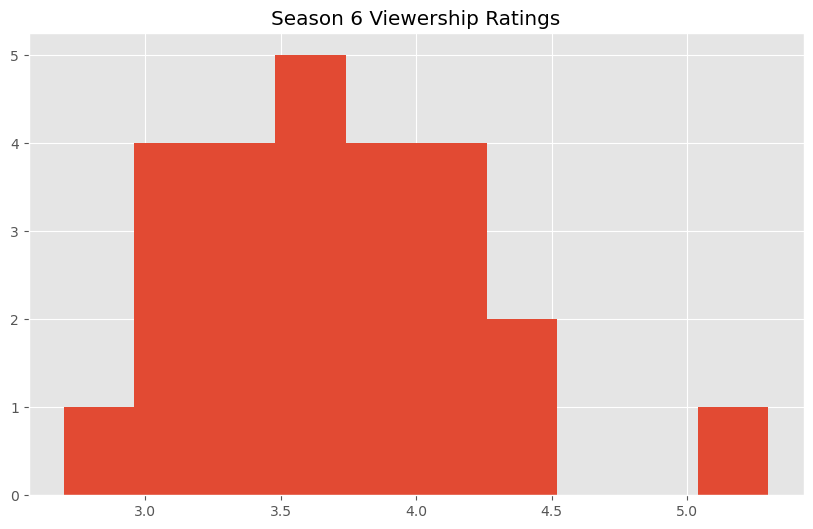

In [19]:
plt.hist(x = 'Viewership rating', data = season_six_anime)
plt.title('Season 6 Viewership Ratings')
plt.show()

In [20]:
season_six_anime['English_Air_Date'] = pd.to_datetime(season_six_anime['English_Air_Date'])

In [21]:
season_six_anime

,No.overall,No. inseason,Title,Storyboarded by,Directed by,Written by,Viewership rating,Original_Air_Date,English_Air_Date
0,114,1,"""A Quiet Beginning""Transcription: ""Shizukana H...",Tomo Ōkubo,Tomo Ōkubo,Yōsuke Kuroda,3.9,2022-10-01,2022-12-04
1,115,2,"""Mirko, the No. 5 Hero""Transcription: ""Nanbā F...",Shōji Ikeno,Shōji Ikeno,Yōsuke Kuroda,3.1,2022-10-08,2022-12-11
2,116,3,"""One's Justice""",Takashi Kawabata,Tsuyoshi Tobita,Yōsuke Kuroda,4.0,2022-10-15,2022-12-18
3,117,4,"""Inheritance""Transcription: ""Keishō"" (Japanese...",Motonobu Hori,Kazuma Komatsu,Yōsuke Kuroda,4.0,2022-10-22,2023-01-08
4,118,5,"""The Thrill of Destruction""Transcription: ""Ham...",Michio Fukuda,Ikurō Satō,Yōsuke Kuroda,4.4,2022-10-29,2023-01-15
5,119,6,"""Encounter, Part 2""Transcription: ""Enkauntā 2""...",Tomo Ōkubo,Tomo Ōkubo,Yōsuke Kuroda,3.6,2022-11-05,2023-01-22
6,120,7,"""Disaster Walker""Transcription: ""Dizasutā Wōkā...",Shōji Ikeno,Shōji Ikeno,Yōsuke Kuroda,3.4,2022-11-12,2023-01-29
7,121,8,"""League of Villains vs. U.A. Students""Transcri...",Kō Matsuo,Kazuma Komatsu,Yōsuke Kuroda,3.4,2022-11-19,2023-02-05
8,122,9,"""Katsuki Bakugo: Rising""Transcription: ""Bakugō...",Tomohiro Kamitani,Tomohiro Kamitani,Yōsuke Kuroda,3.7,2022-11-26,2023-02-12
9,123,10,"""The Ones Within Us""Transcription: ""Bokura no ...",Tomo Ōkubo,Tomo Ōkubo,Yōsuke Kuroda,5.3,2022-12-03,2023-02-19


## There are 100 nan values in kudos,  5%, will fill with median.

In [22]:
len(AO3.kudos)
AO3.isna().sum() #100/2000 = 0.05

title                        0
mixed fandom                 0
ships                        0
characters                   0
hits                         0
kudos                      100
published                    0
Deku                         0
Bakugo                       0
Deku & Bakugo                0
Aizawa                       0
Prez Mic                     0
Aizawa & Prez Mic            0
Aizawa & Deku                0
Enjiro                       0
Bakugo & Kirishima           0
Shoto                        0
Deku & Shoto                 0
Dabi                         0
Hawks                        0
Dabi & Hawks                 0
Uraraka                      0
Deku & Uraraka               0
All Might                    0
Deku & All Might             0
Class                        0
Deku & Class                 0
Denki                        0
Shinsou                      0
Denki & Shinsou              0
Deku & Shinsou               0
Reader                       0
Bakugo &

In [23]:
ships_dates = AO3.drop(columns = ['title', 'mixed fandom', 'ships', 'characters'])
display(ships_dates.describe())
ships_dates['sum hits'] = ships_dates['hits']
ships_dates['sum kudos'] = ships_dates['kudos']

,hits,kudos,Deku,Bakugo,Deku & Bakugo,Aizawa,Prez Mic,Aizawa & Prez Mic,Aizawa & Deku,Enjiro,...,Kirashima,Mina & Kirashima,Jirou,Jirou & Denki,Shigaraki Tomura,Deku & Shigaraki Tomura,Aizawa & Shinsou,Nedzu,Deku & Nedzu,Deku & Reader
count,2000.000000,1900.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,8665.995500,264.750526,0.476500,0.34300,0.30050,0.217500,0.159500,0.158000,0.161000,0.0,...,0.063000,0.063000,0.044500,0.044500,0.046000,0.046000,0.084000,0.023500,0.023500,0.023500
std,39620.134538,839.730126,0.499572,0.47483,0.45859,0.412649,0.366233,0.364832,0.367623,0.0,...,0.243024,0.243024,0.206255,0.206255,0.209537,0.209537,0.277457,0.151523,0.151523,0.151523
min,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,146.250000,12.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,643.500000,47.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3499.000000,176.000000,1.000000,1.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,980853.000000,15449.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
ships_dates_group = ships_dates.groupby(['published']).agg({'hits': 'mean','sum hits': 'sum', 'kudos': 'mean', 'sum kudos': 'sum', 'Deku': 'sum', 'Bakugo': 'sum', 'Deku & Bakugo': 'sum', 'Aizawa': 'sum',
       'Prez Mic': 'sum', 'Aizawa & Prez Mic': 'sum', 'Aizawa & Deku': 'sum', 'Enjiro': 'sum',
       'Bakugo & Kirishima': 'sum', 'Shoto': 'sum', 'Deku & Shoto': 'sum', 'Dabi': 'sum', 'Hawks': 'sum',
       'Dabi & Hawks': 'sum', 'Uraraka': 'sum', 'Deku & Uraraka': 'sum', 'All Might': 'sum',
       'Deku & All Might': 'sum', 'Class': 'sum', 'Deku & Class': 'sum', 'Denki': 'sum', 'Shinsou': 'sum',
       'Denki & Shinsou': 'sum', 'Deku & Shinsou': 'sum', 'Reader': 'sum', 'Bakugo & Reader': 'sum',
       'Bakugo & Shoto': 'sum', 'Deku & Prez Mic': 'sum', 'Mina': 'sum', 'Kirashima': 'sum',
       'Mina & Kirashima': 'sum', 'Jirou': 'sum', 'Jirou & Denki': 'sum', 'Shigaraki Tomura': 'sum',
       'Deku & Shigaraki Tomura': 'sum', 'Aizawa & Shinsou': 'sum', 'Nedzu': 'sum', 'Deku & Nedzu': 'sum',
       'Deku & Reader': 'sum'})


,hits,sum hits,kudos,sum kudos,Deku,Bakugo,Deku & Bakugo,Aizawa,Prez Mic,Aizawa & Prez Mic,...,Kirashima,Mina & Kirashima,Jirou,Jirou & Denki,Shigaraki Tomura,Deku & Shigaraki Tomura,Aizawa & Shinsou,Nedzu,Deku & Nedzu,Deku & Reader
published,,,,,,,,,,,,,,,,,,,,,
2023-03-28,5038.237668,1123527,207.631336,45056.0,98,83,72,42,32,32,...,13,13,5,5,6,6,17,2,2,6
2023-03-29,10360.756329,3273999,268.943333,80683.0,153,97,87,68,46,45,...,25,25,12,12,17,17,24,9,9,4
2023-03-30,7297.185629,2437260,206.859813,66402.0,153,120,103,56,44,44,...,16,16,11,11,15,15,22,5,5,7
2023-03-31,10257.478261,4010674,323.010610,121775.0,192,131,117,93,69,68,...,28,28,27,27,23,23,33,8,8,9
2023-04-01,8314.491489,3907811,270.715232,122634.0,224,153,128,113,82,82,...,23,23,19,19,20,20,46,15,15,11
2023-04-02,9684.541667,2556719,285.601732,65974.0,131,101,93,62,46,45,...,21,21,15,15,11,11,26,8,8,10
2023-04-03,11000.500000,22001,502.000000,502.0,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
ships_only = ships_dates_group.loc[:,['Deku & Bakugo', 'Aizawa & Prez Mic', 'Aizawa & Deku', 'Bakugo & Kirishima', 'Deku & Shoto', 'Dabi & Hawks', 'Deku & Uraraka', 'Deku & All Might', 'Deku & Class', 'Denki & Shinsou', 'Deku & Shinsou', 'Bakugo & Reader', 'Bakugo & Shoto', 'Deku & Prez Mic', 'Mina & Kirashima', 'Jirou & Denki', 'Deku & Shigaraki Tomura', 'Aizawa & Shinsou', 'Deku & Nedzu', 'Deku & Reader']]

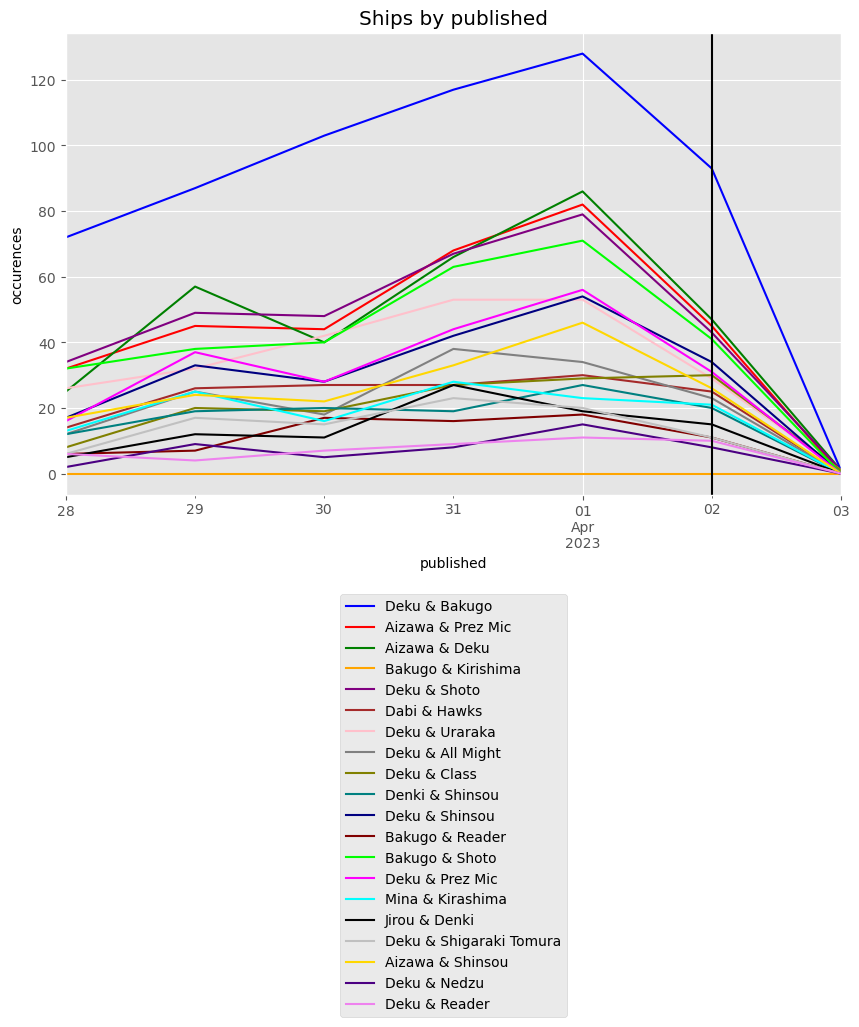

In [26]:
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal',
          'navy', 'maroon', 'lime', 'fuchsia', 'aqua', 'black', 'silver', 'gold', 'indigo', 'violet']


ships_only.plot(color = colors)
plt.ylabel('occurences')
plt.title('Ships by published')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'upper center')
plt.axvline(x = season_six_anime['English_Air_Date'][19], color = 'black')
plt.show()

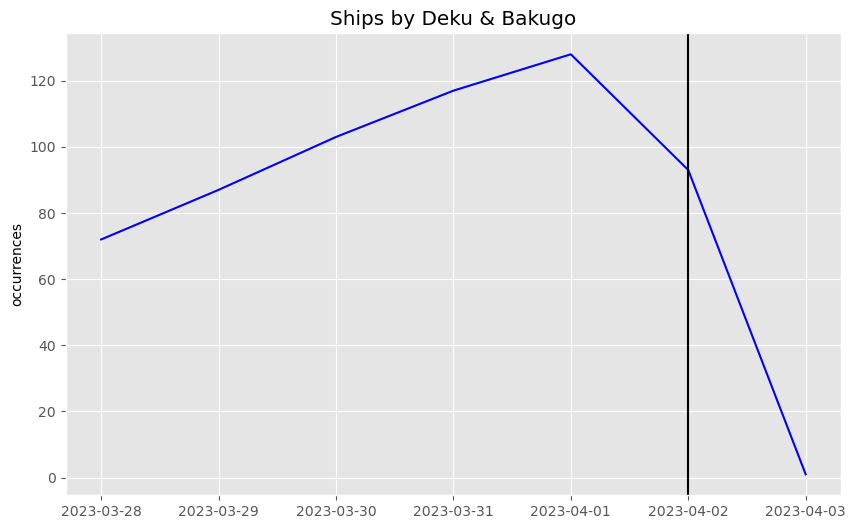

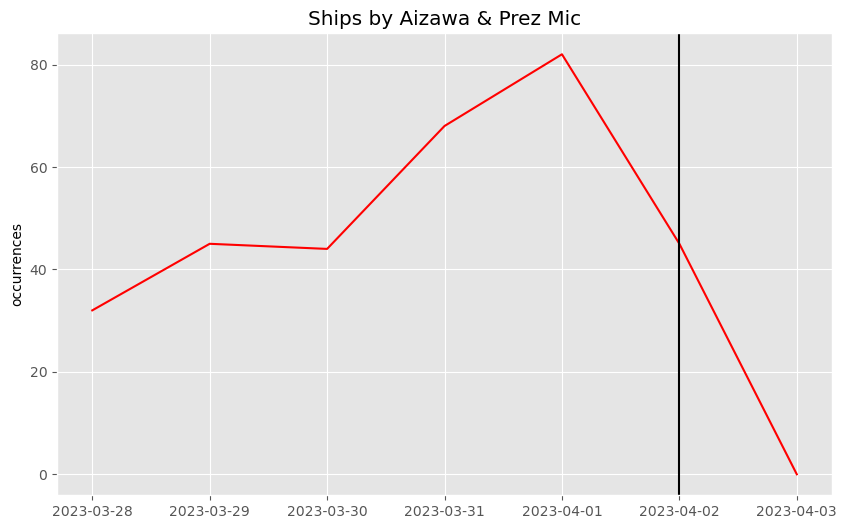

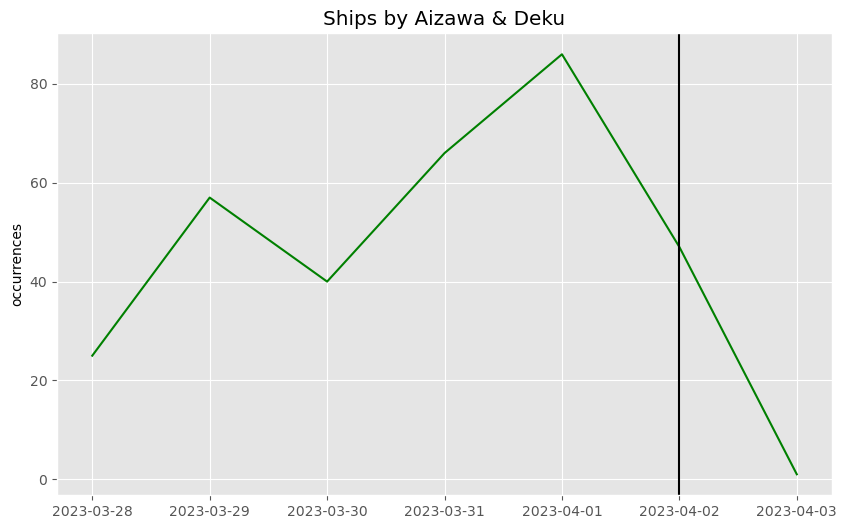

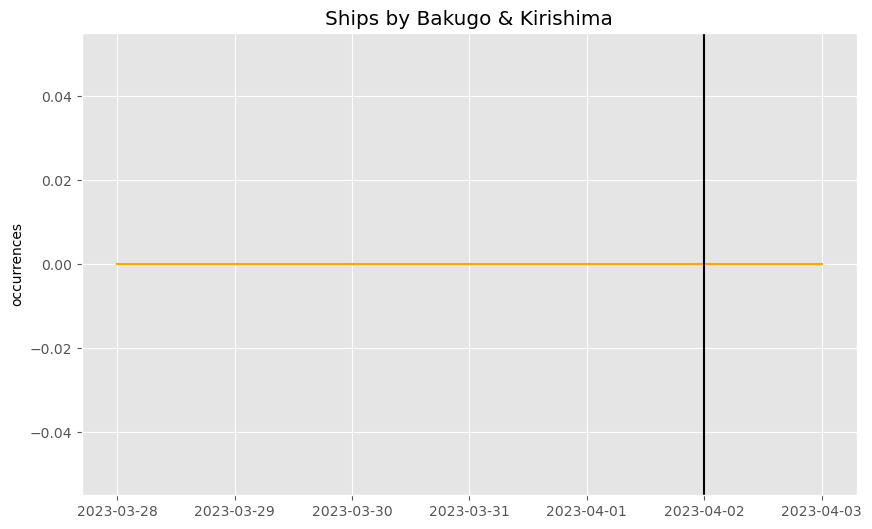

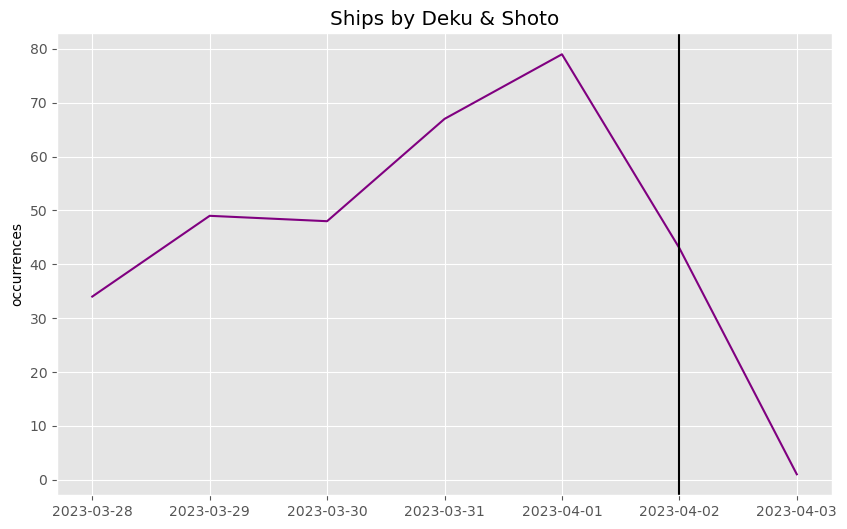

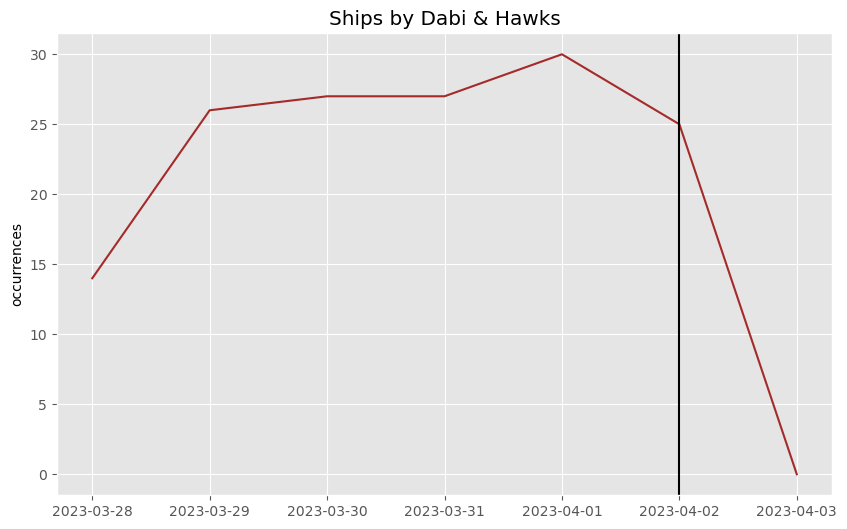

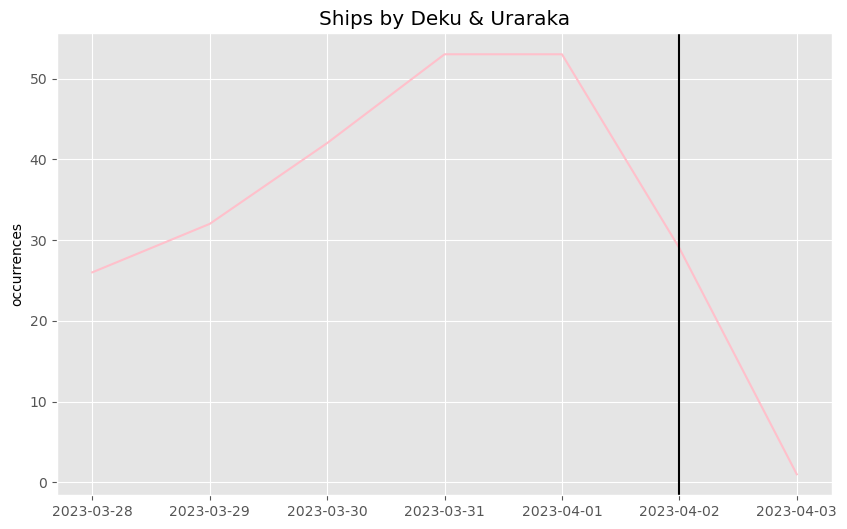

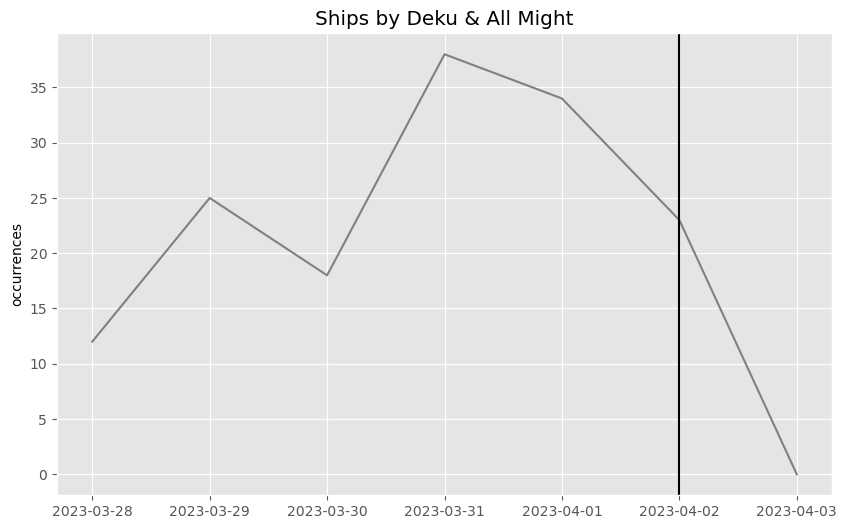

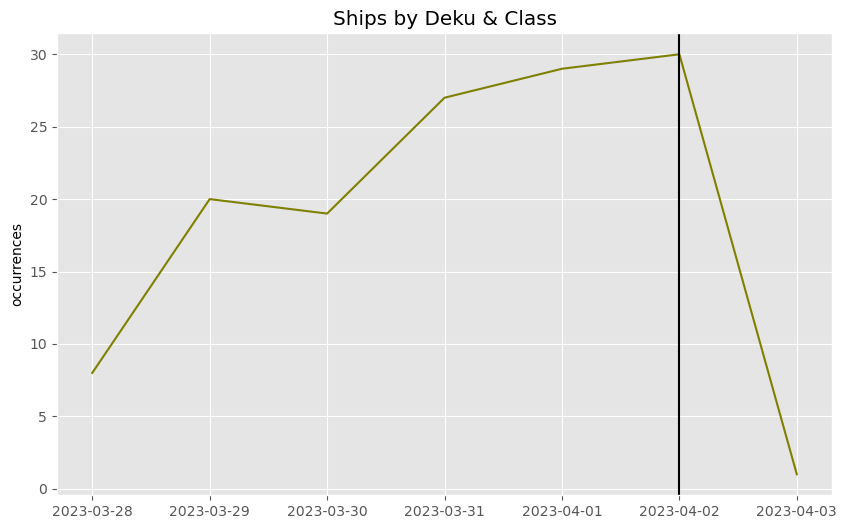

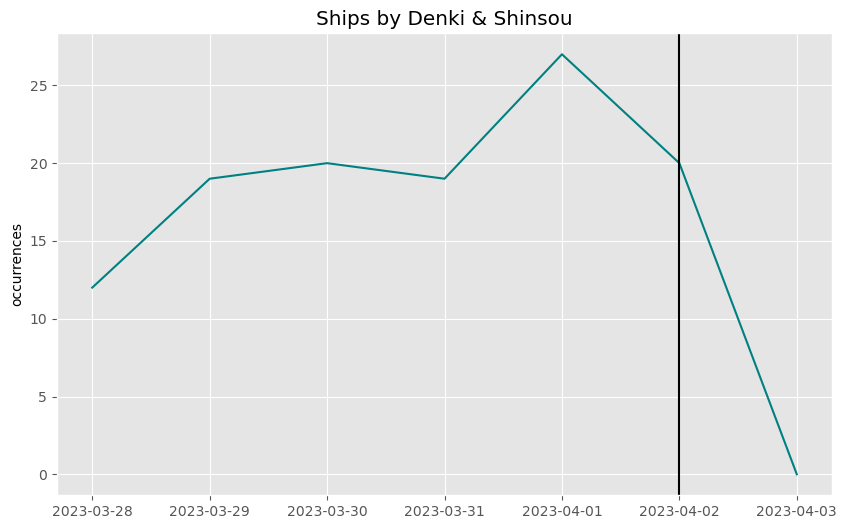

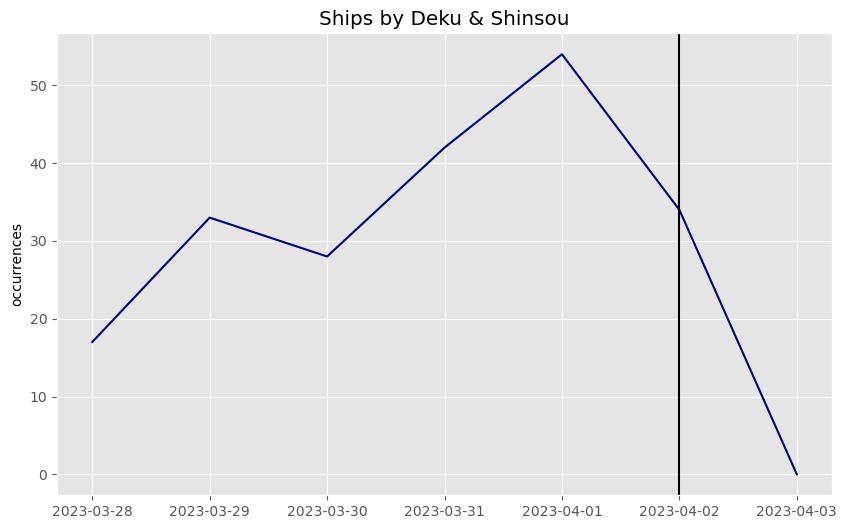

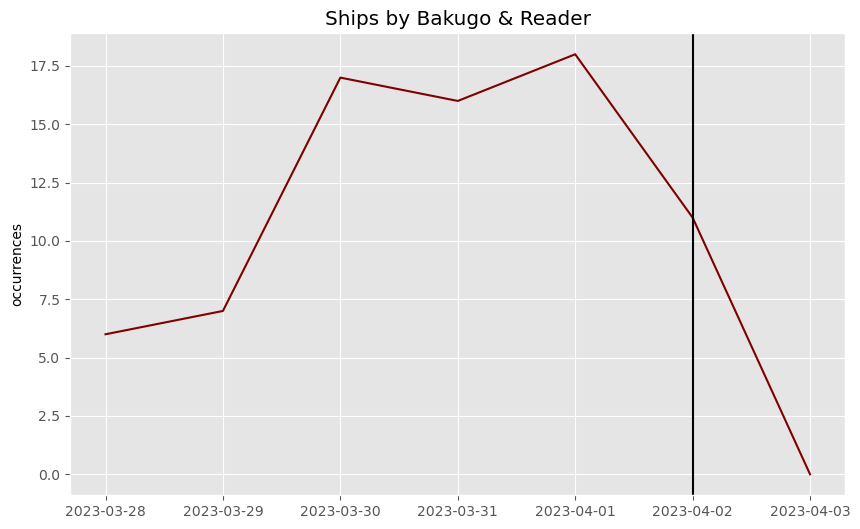

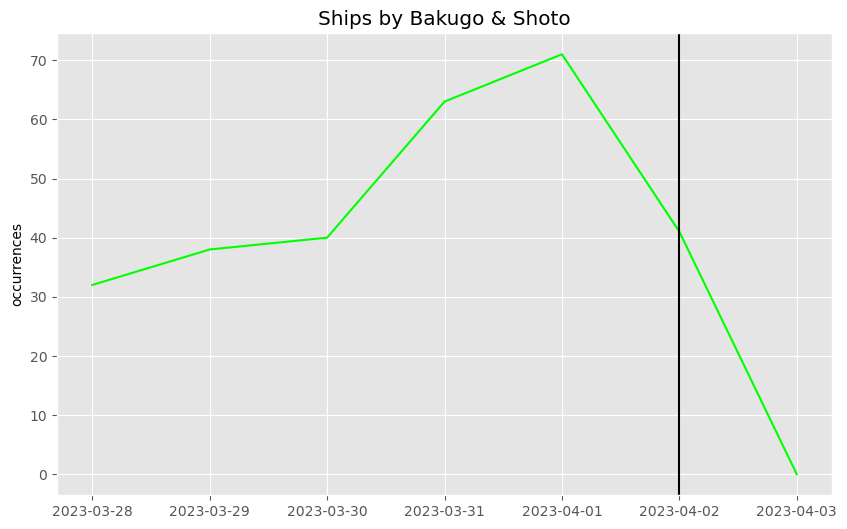

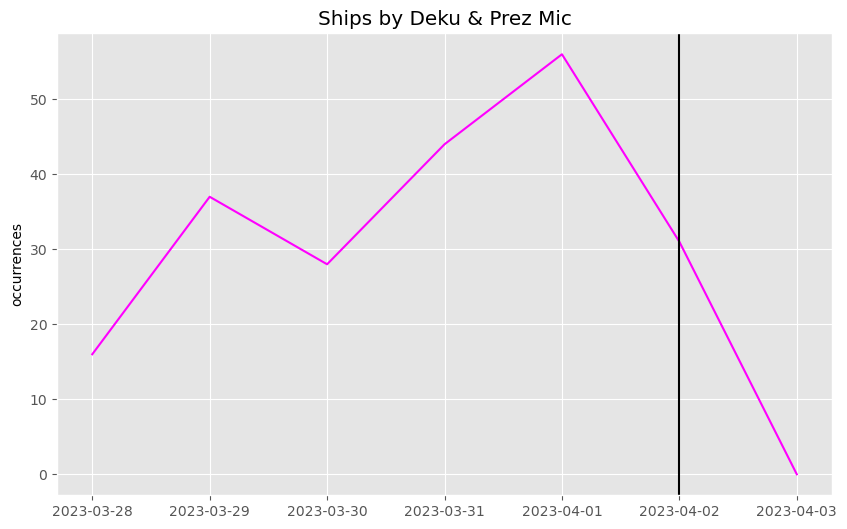

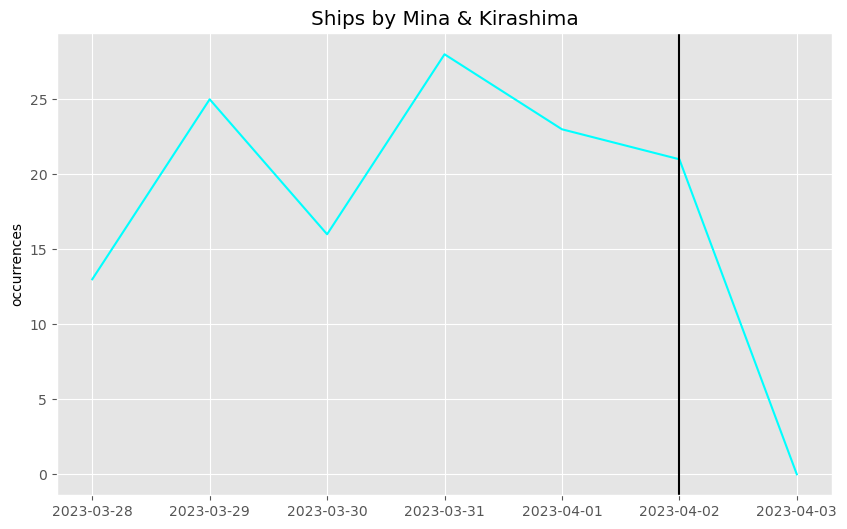

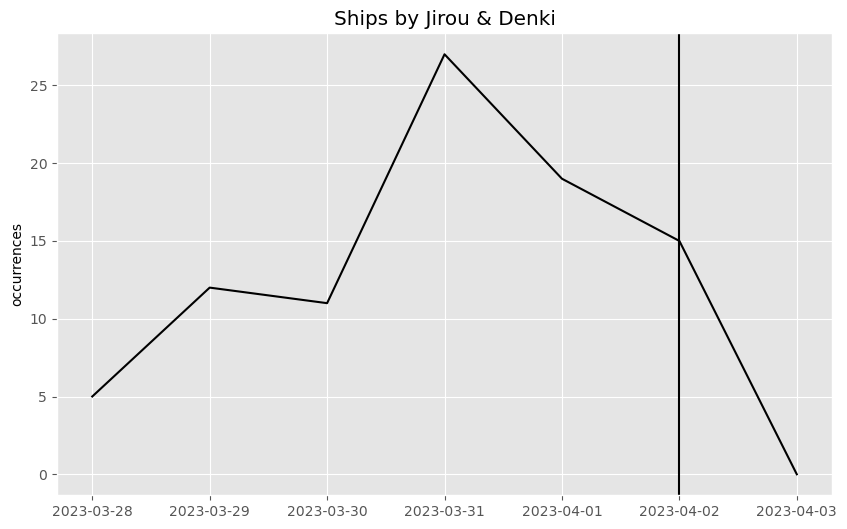

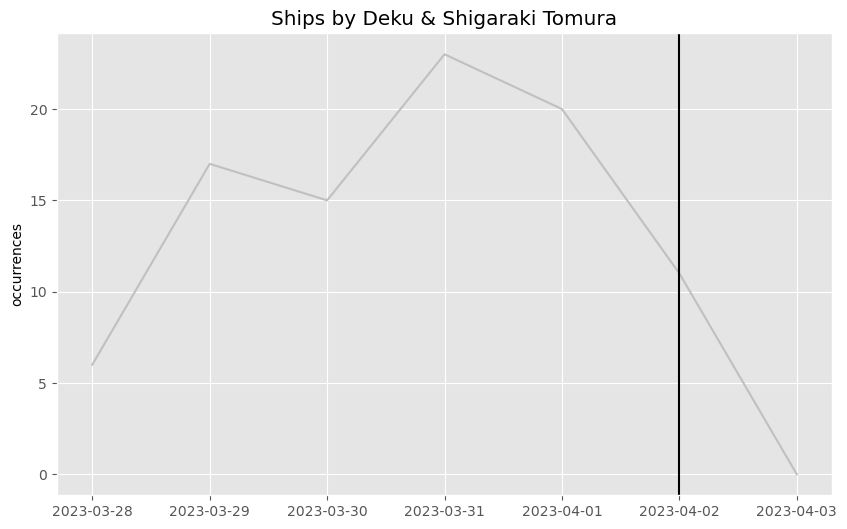

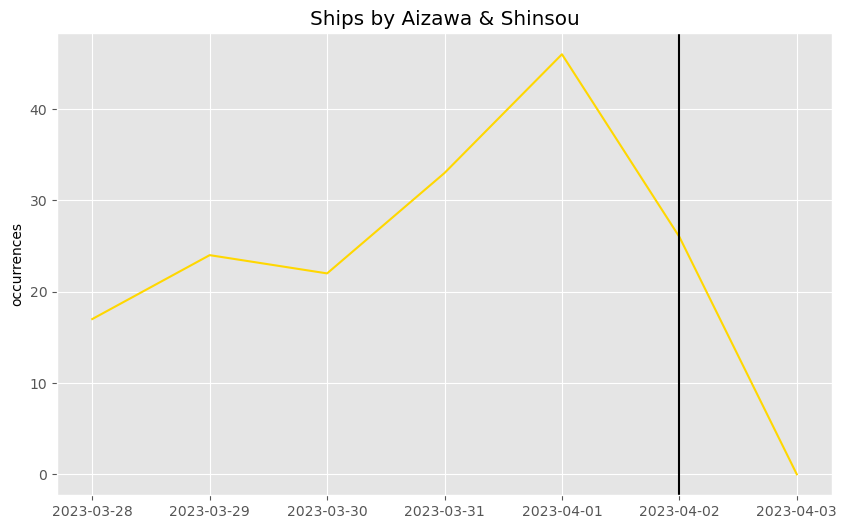

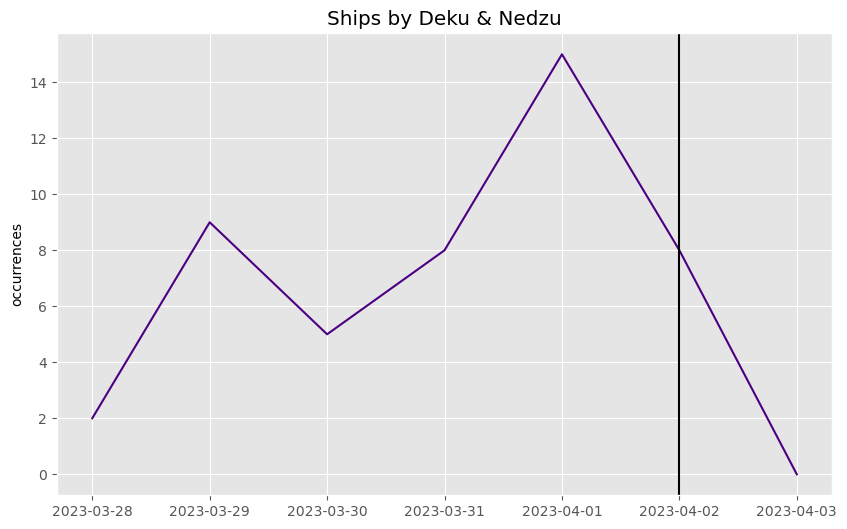

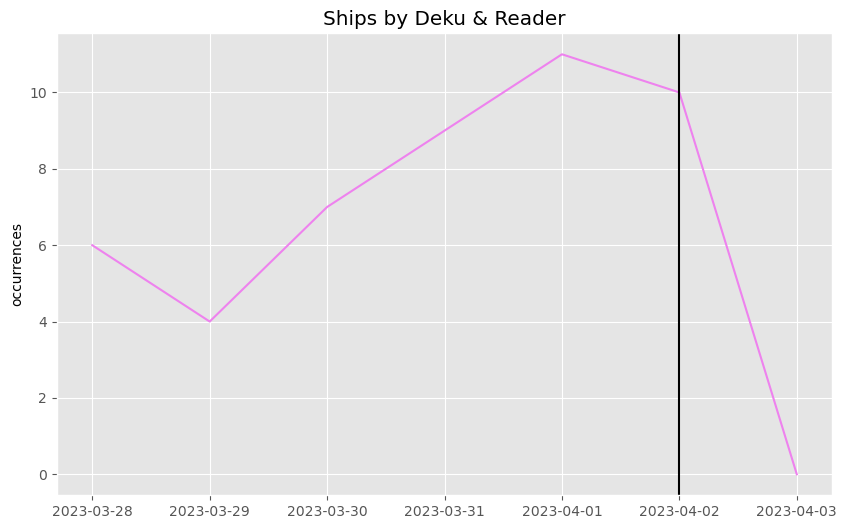

In [27]:
for col in ships_only.columns:
    plt.figure() # create a new figure for each plot
    plt.plot(ships_only[col], color=colors[ships_only.columns.get_loc(col)])
    plt.ylabel('occurrences')
    plt.title('Ships by ' + col)
    plt.axvline(x = season_six_anime['English_Air_Date'][19], color = 'black')
    plt.show()

In [28]:
char_in_ships = ships_dates_group.drop(columns = ['kudos', 'hits', 'sum kudos', 'sum hits', 'Deku & Bakugo', 'Aizawa & Prez Mic', 'Aizawa & Deku', 'Bakugo & Kirishima', 'Deku & Shoto', 'Dabi & Hawks', 'Deku & Uraraka', 'Deku & All Might', 'Deku & Class', 'Denki & Shinsou', 'Deku & Shinsou', 'Bakugo & Reader', 'Bakugo & Shoto', 'Deku & Prez Mic', 'Mina & Kirashima', 'Jirou & Denki', 'Deku & Shigaraki Tomura', 'Aizawa & Shinsou', 'Deku & Nedzu', 'Deku & Reader'])

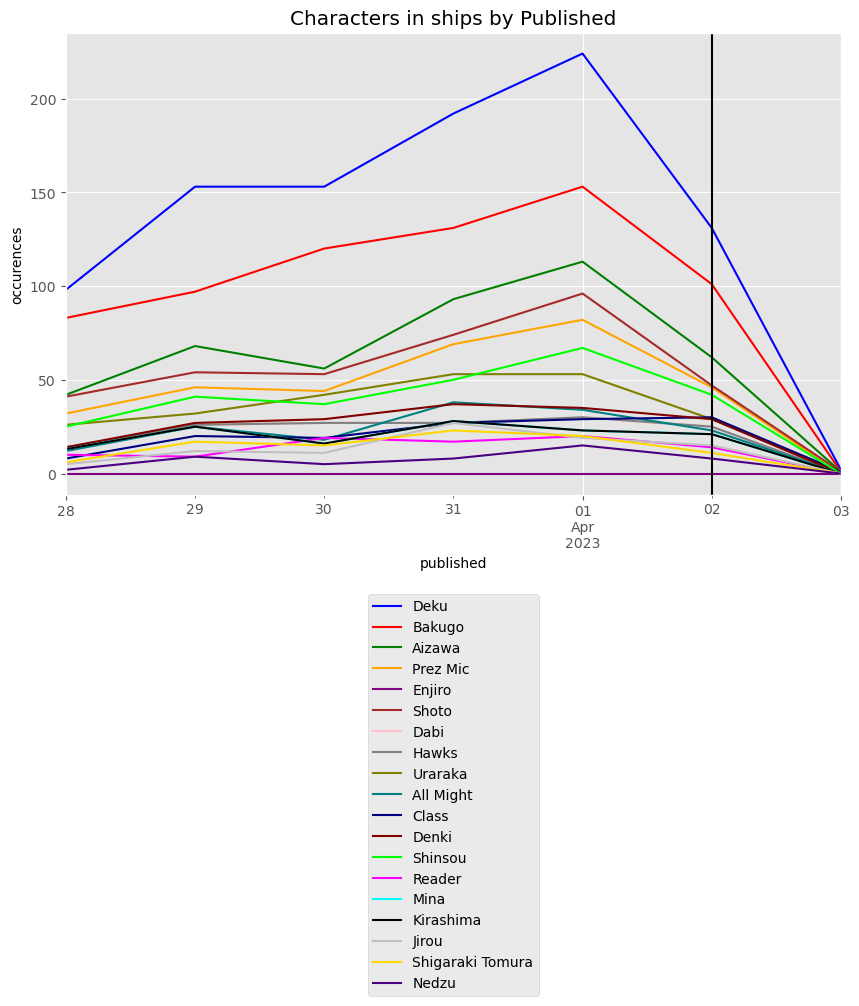

In [29]:
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal',
          'navy', 'maroon', 'lime', 'fuchsia', 'aqua', 'black', 'silver', 'gold', 'indigo', 'violet']


char_in_ships.plot(color = colors)
plt.ylabel('occurences')
plt.title('Characters in ships by Published')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'upper center')
plt.axvline(x = season_six_anime['English_Air_Date'][19], color = 'black')
plt.show()

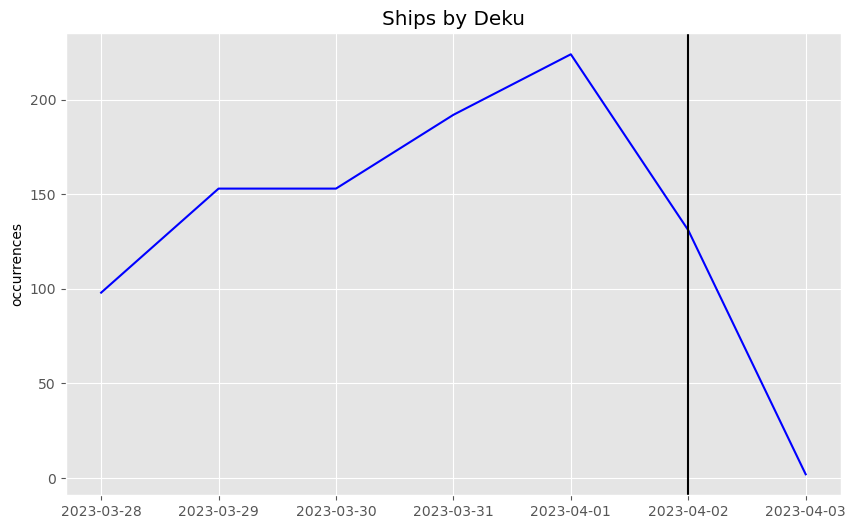

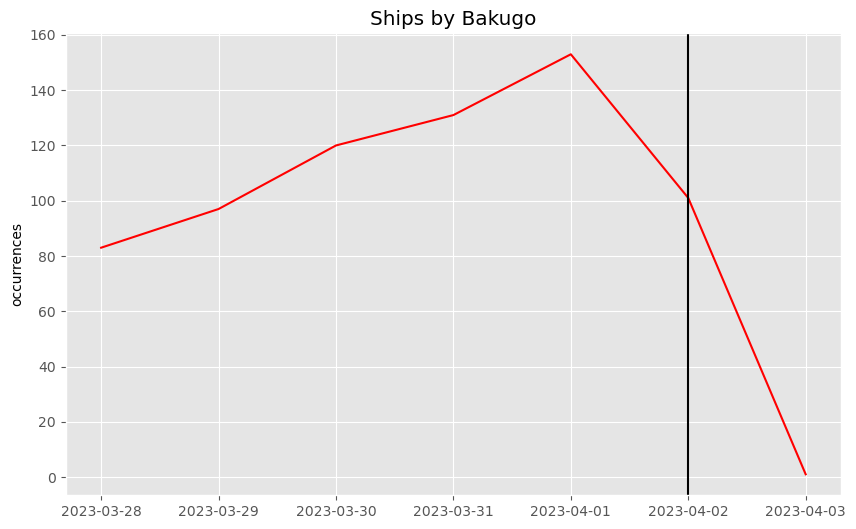

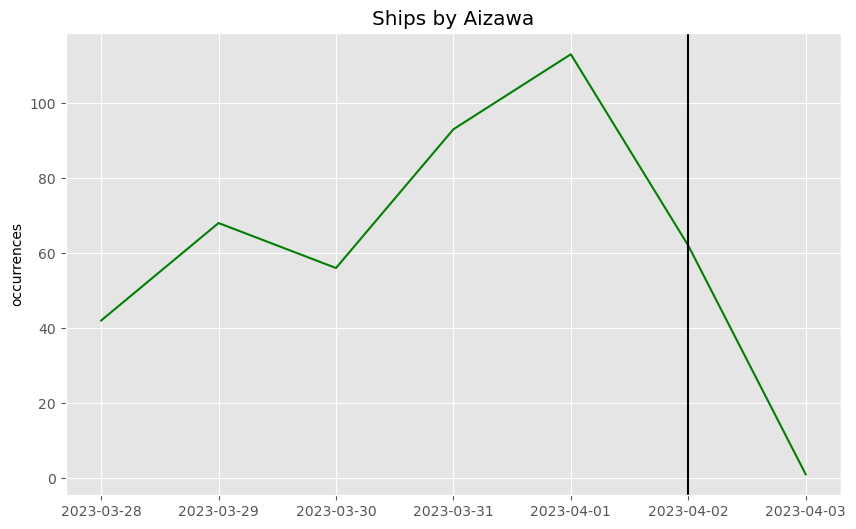

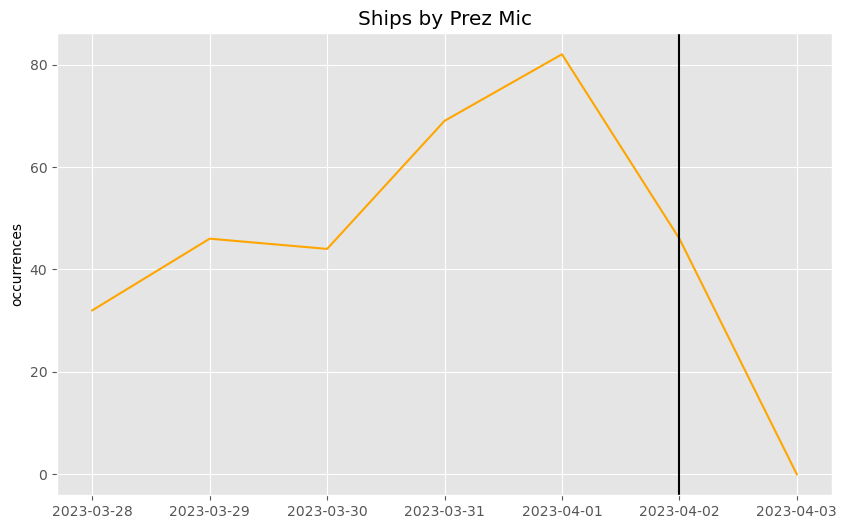

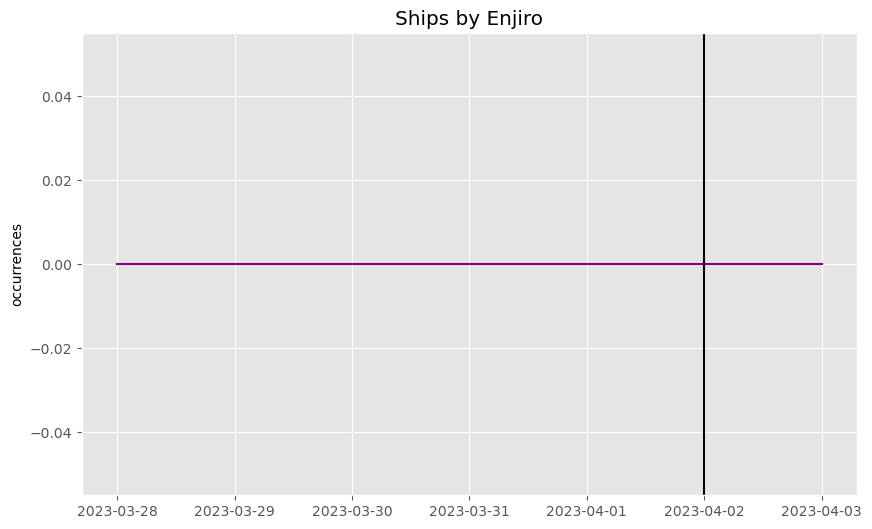

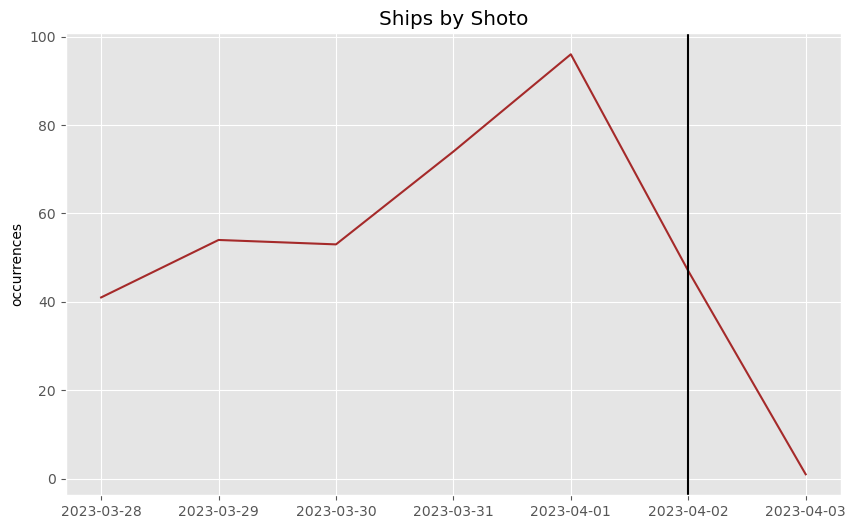

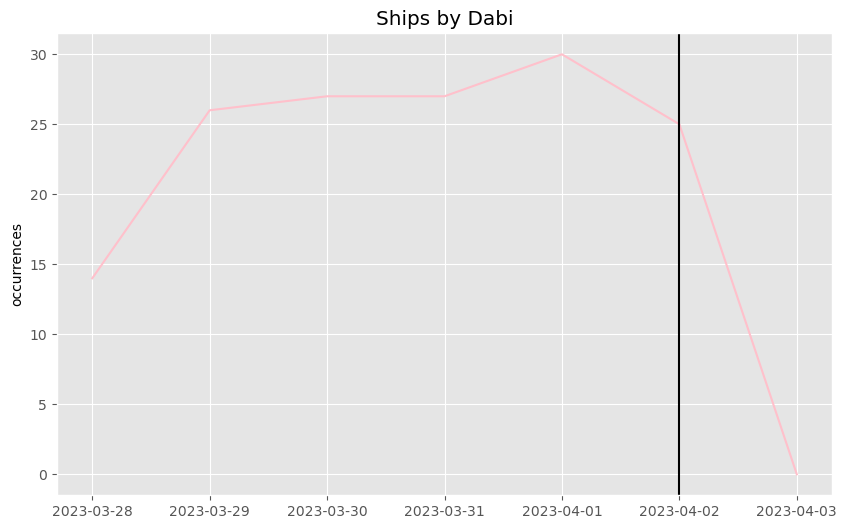

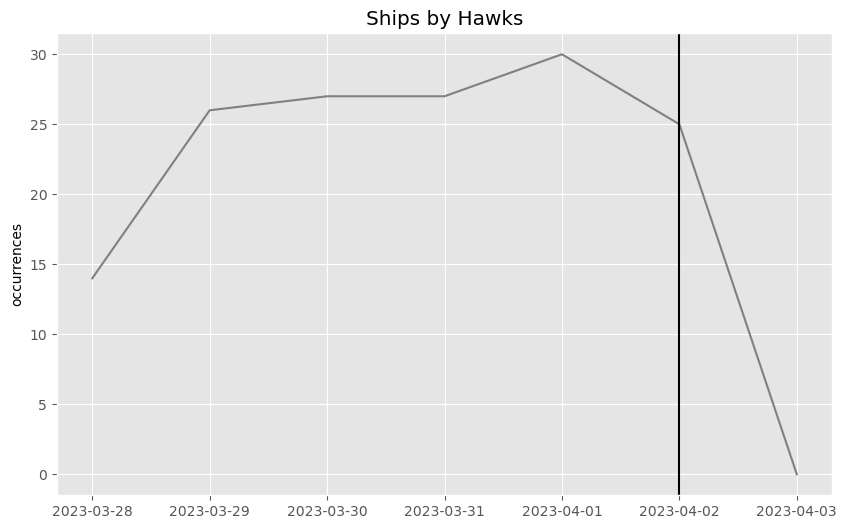

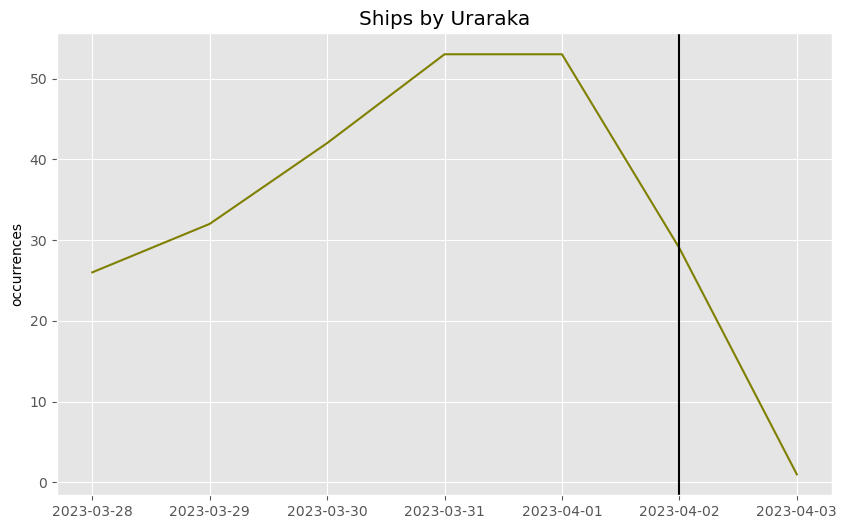

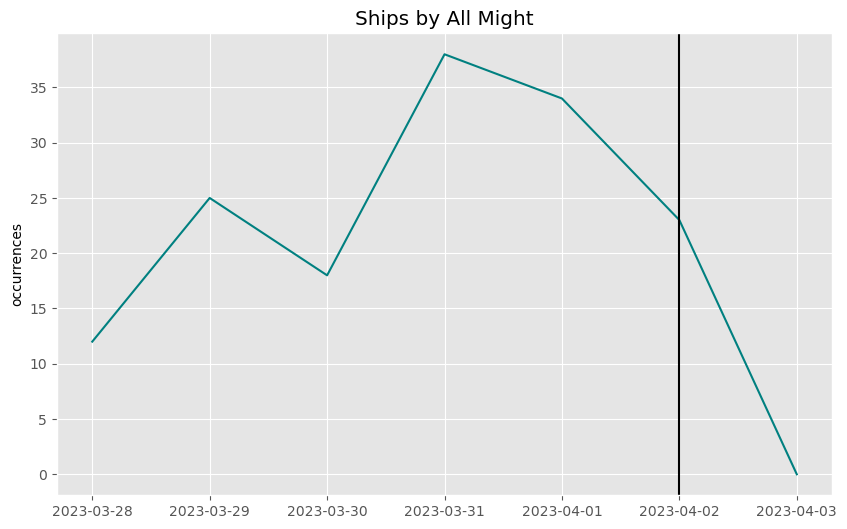

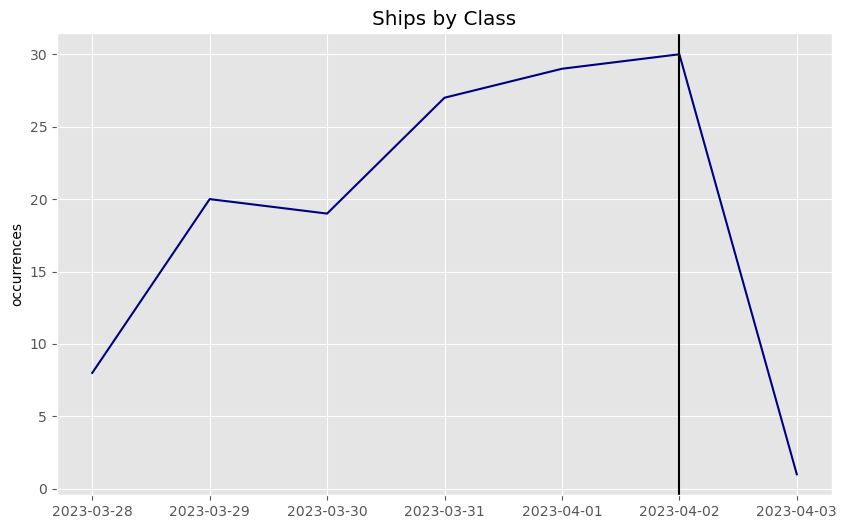

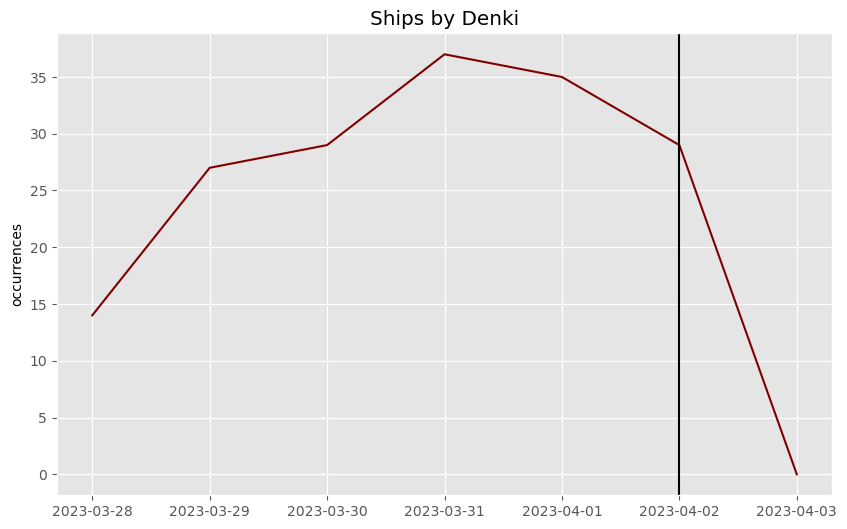

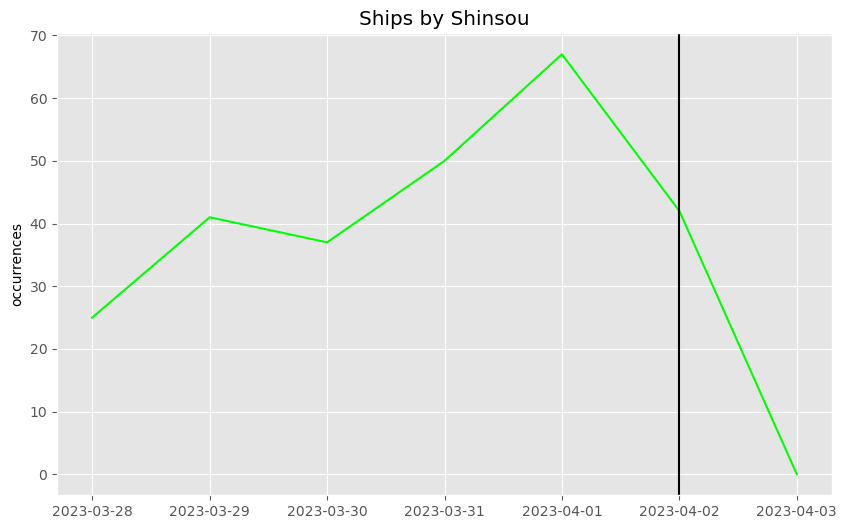

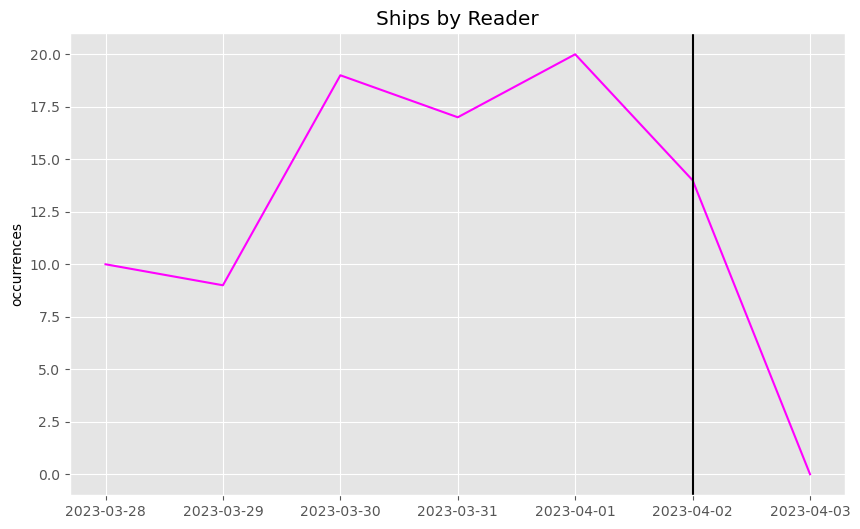

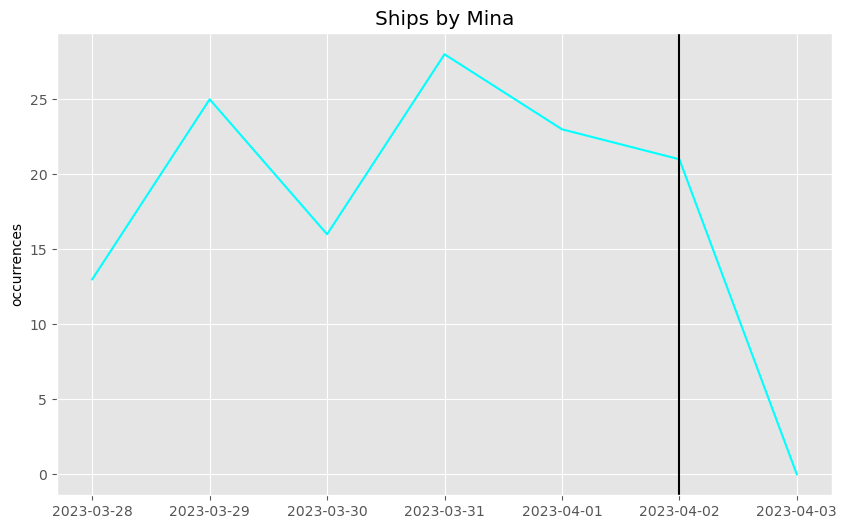

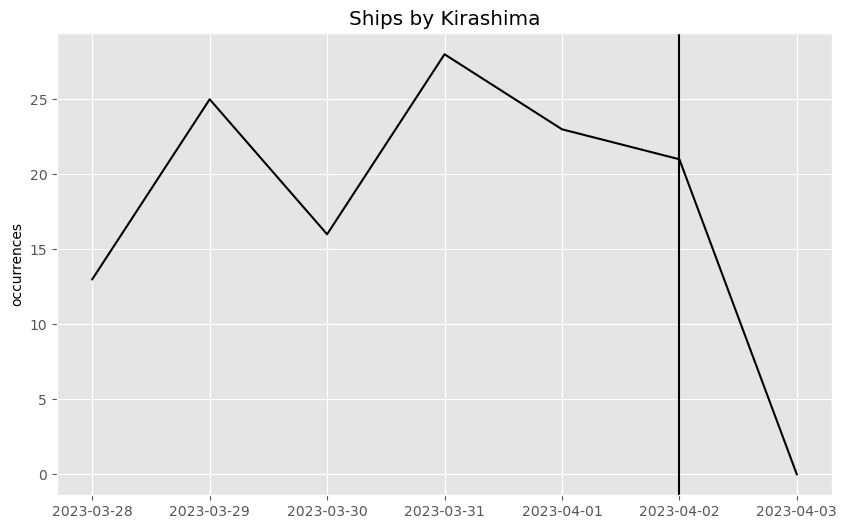

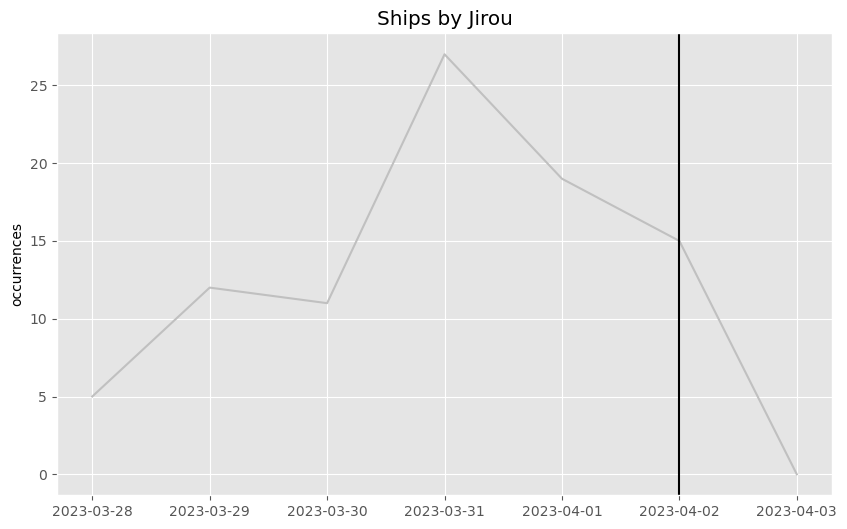

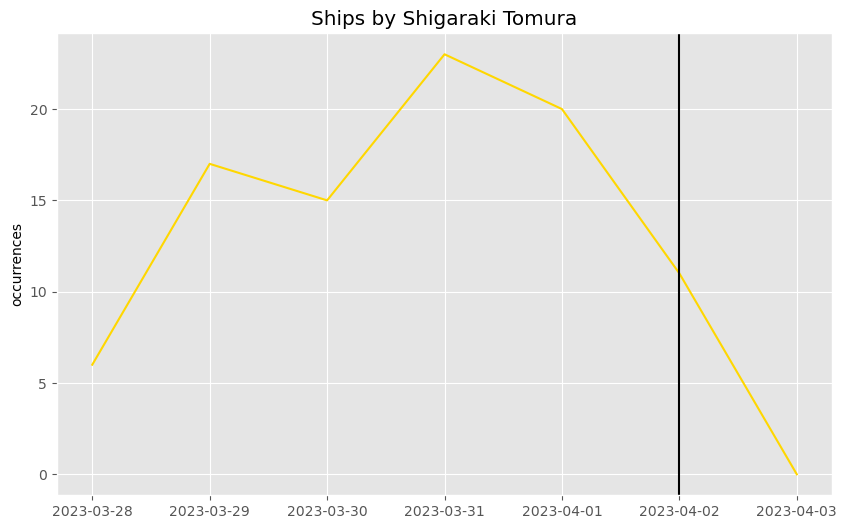

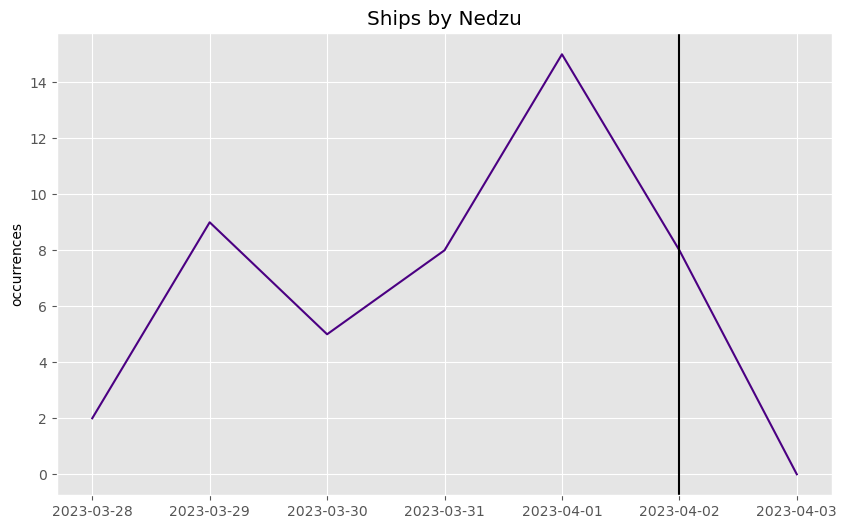

In [30]:
for col in char_in_ships.columns:
    plt.figure() # create a new figure for each plot
    plt.plot(char_in_ships[col], color=colors[char_in_ships.columns.get_loc(col)])
    plt.ylabel('occurrences')
    plt.title('Ships by ' + col)
    plt.axvline(x = season_six_anime['English_Air_Date'][19], color = 'black')
    plt.show()

C:\Users\tessa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\tessa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\tessa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


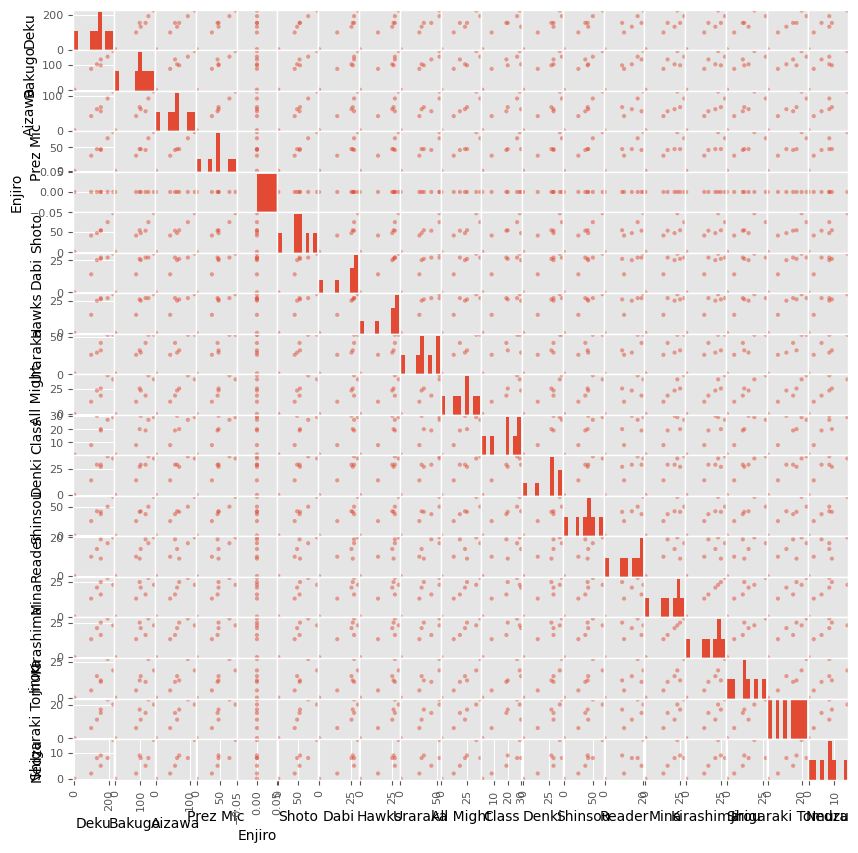

In [31]:
scatter_matrix(char_in_ships, figsize = (10, 10))
plt.show()

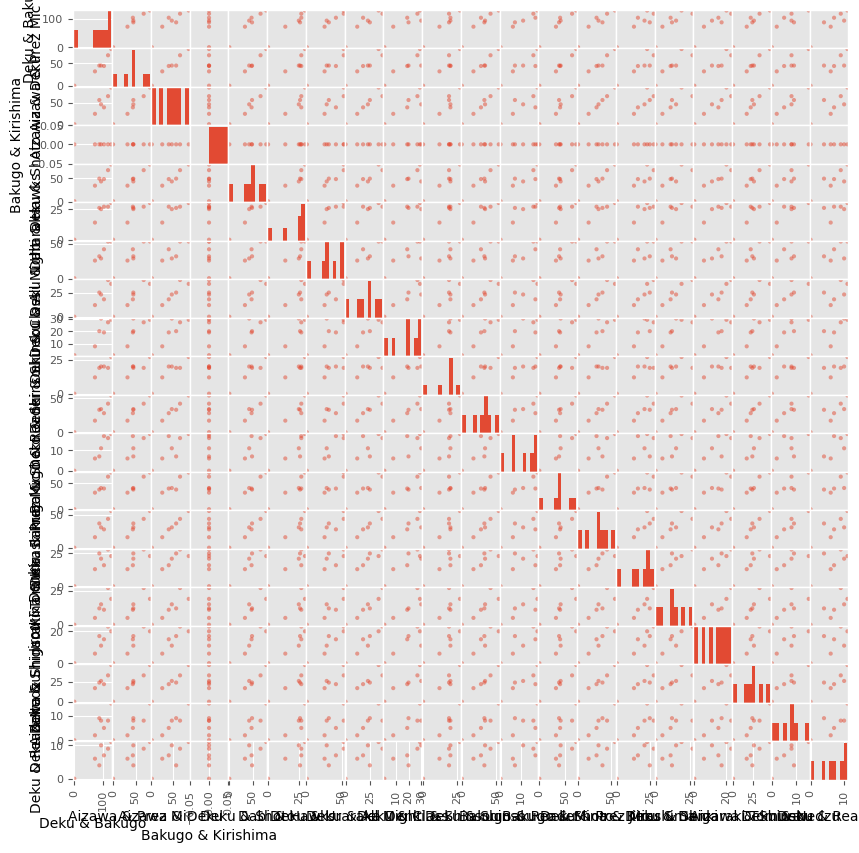

In [32]:
scatter_matrix(ships_only, figsize = (10, 10))
plt.show()

In [48]:
hits_Deku_Bakugo = stats.pointbiserialr(ships_dates_group['Deku & Bakugo'],ships_dates_group['hits'])
hits_Deku_Bakugo

SignificanceResult(statistic=-0.24015531110459698, pvalue=0.6039542302205025)

In [49]:
kudos_Deku_Bakugo = stats.pointbiserialr(ships_dates_group['Deku & Bakugo'],ships_dates_group['kudos'])
kudos_Deku_Bakugo

SignificanceResult(statistic=-0.7198381311511214, pvalue=0.0681516770675025)

In [50]:
hits_Deku_Reader = stats.pointbiserialr(ships_dates_group['Deku & Reader'],ships_dates_group['hits'])
hits_Deku_Reader

SignificanceResult(statistic=-0.26017169741669266, pvalue=0.573114330138583)

In [51]:
kudos_Deku_Reader = stats.pointbiserialr(ships_dates_group['Deku & Reader'],ships_dates_group['kudos'])
kudos_Deku_Reader

SignificanceResult(statistic=-0.5887467927195126, pvalue=0.16431287238538667)